<a href="https://colab.research.google.com/github/gmaad/MetodyKlasRed/blob/main/DONE_List_nr_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK NO 3: PCA, SVD, kernelPCA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import decomposition # for PCA


import imageio # here only for reading images


**MNIST dataset** (again)

In [ ]:
mnist = datasets.load_digits()
max_n=600
mnist_points =        mnist.data[:max_n]
mnist_data_classes =  mnist.target[:max_n]
mnist_classes_names  =      mnist.target_names

In [ ]:
print("mnist_points.shape = ", mnist_points.shape)
print("mnist_classes_names = ",mnist_classes_names )

mnist_points.shape =  (600, 64)
mnist_classes_names =  [0 1 2 3 4 5 6 7 8 9]


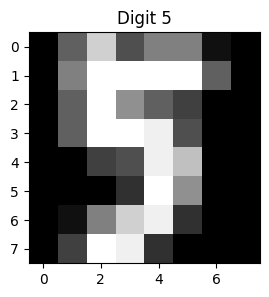

In [ ]:
k=33

fig, ax = plt.subplots(figsize=(3,3) )
ax.imshow(mnist_points[k].reshape(8,8), cmap='gray')
ax.set_title('Digit ' + str(mnist_data_classes[k]))
plt.show()

PCA to 3d and plot digits

In [ ]:
pca3 = decomposition.PCA(n_components=3)
pca3.fit(mnist_points)
mnist_pca_reduced_3d = pca3.transform(mnist_points)



#iris_points_pca_2d = pca.transform(Z)
print(mnist_pca_reduced_3d.shape)

(600, 3)


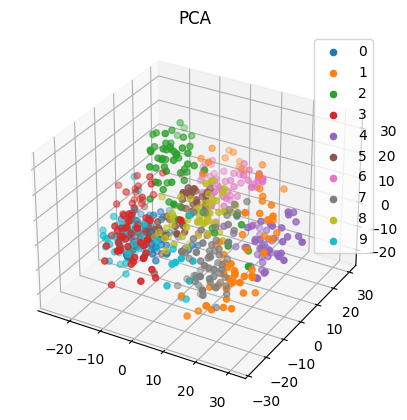

In [ ]:
fig_pca = plt.figure(1)
ax_pca = fig_pca.add_subplot(111, projection='3d')
ax_pca.set_title("PCA")

for wt in range(0,len(mnist_classes_names)):
    points_pca=mnist_pca_reduced_3d[mnist_data_classes == wt];
    ax_pca.scatter(points_pca[:,0], points_pca[:,1], points_pca[:,2], label=mnist_classes_names[wt])

ax_pca.legend()



# Q3.1
* a) From dataset MNIST extract only digits `1` and `4`. Performe PCA only on those digits. Plot `1` and `4` in 3d resulting from PCA on these digits and resulting from PCA performed on the whole dataset
* b) Do the same performing PCA 2d

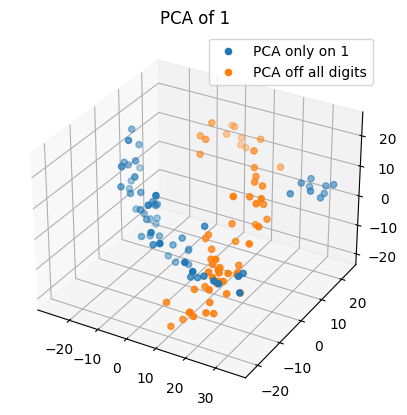

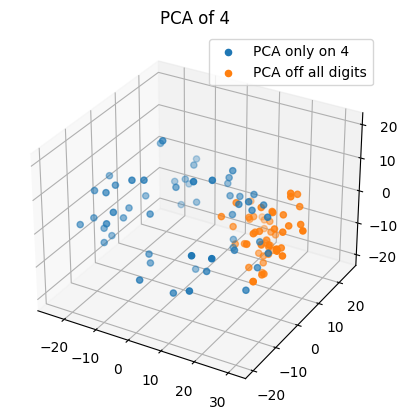

In [ ]:
# a)
pca3 = decomposition.PCA(n_components=3)
pca3.fit(mnist_points)
mnist_pca_reduced_3d = pca3.transform(mnist_points)

def pca_comparison(number, fig):
    indexes = np.where(mnist_data_classes == number)
    points = mnist_points[indexes]

    pca3 = decomposition.PCA(n_components=3)
    pca3.fit(points)
    pca_reduced_3d = pca3.transform(points)

    fig_pca = plt.figure(fig)
    ax_pca = fig_pca.add_subplot(111, projection='3d')
    ax_pca.set_title("PCA of " + str(number))
    ax_pca.scatter(pca_reduced_3d[:,0], pca_reduced_3d[:,1], pca_reduced_3d[:,2], label='PCA only on ' + str(number))

    points_pca=mnist_pca_reduced_3d[indexes];
    ax_pca.scatter(points_pca[:,0], points_pca[:,1], points_pca[:,2], label='PCA off all digits')
    ax_pca.legend()

pca_comparison(1,1)
pca_comparison(4,2)

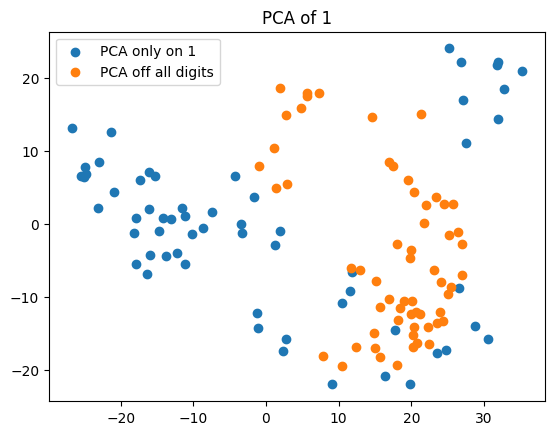

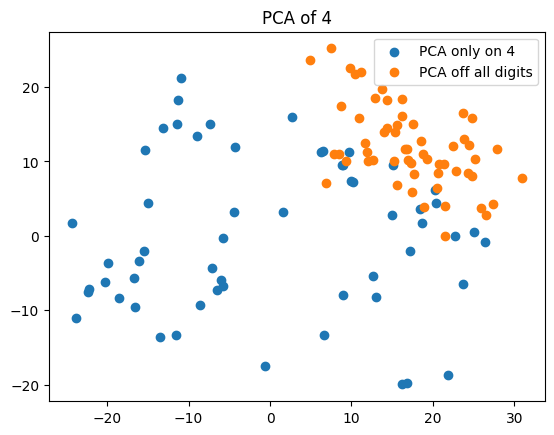

In [ ]:
# b)
pca2 = decomposition.PCA(n_components=2)
pca2.fit(mnist_points)
mnist_pca_reduced_2d = pca2.transform(mnist_points)

def pca_comparison(number, fig):
    indexes = np.where(mnist_data_classes == number)
    points = mnist_points[indexes]

    pca2 = decomposition.PCA(n_components=2)
    pca2.fit(points)
    pca_reduced_2d = pca2.transform(points)

    fig_pca = plt.figure(fig)
    ax_pca = fig_pca.add_subplot(111)
    ax_pca.set_title("PCA of " + str(number))
    ax_pca.scatter(pca_reduced_2d[:,0], pca_reduced_2d[:,1], label='PCA only on ' + str(number))

    points_pca=mnist_pca_reduced_2d[indexes];
    ax_pca.scatter(points_pca[:,0], points_pca[:,1],label='PCA off all digits')
    ax_pca.legend()

pca_comparison(1,1)
pca_comparison(4,2)

## PCA: Color to grayscale

In [ ]:
img_nuclei = imageio.v3.imread('https://raw.githubusercontent.com/lorek/datasets/master/nuclei1b.jpg')
img_number = imageio.v3.imread('https://raw.githubusercontent.com/lorek/datasets/master/nr42.png')

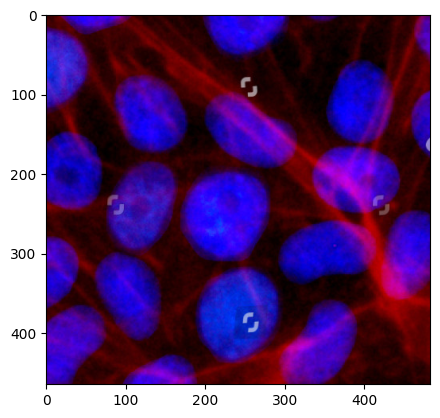

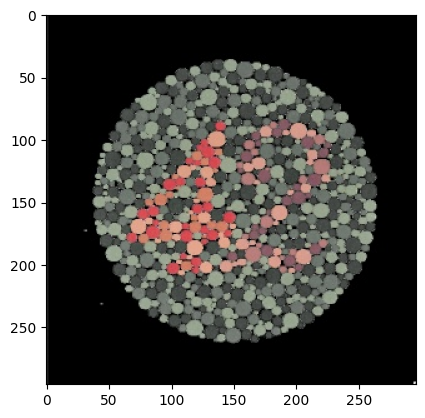

In [ ]:
plt.imshow(img_nuclei)
plt.show()
plt.imshow(img_number)
plt.show()


In [ ]:
print(img_nuclei.shape)

(465, 483, 3)


Color images $X$ == `np.array` of size $h\times w \times 3$, where $X[:,:,0]$ is a 2d array of red values, $X[:,:,1]$ or green values and $X[:,:,2]$ of blue values.
Thus, we may construct $n=h\cdot w$ three-dimenional points:

$$\mathbf{x}_0 =
\left(\begin{array}{ccc} X[0,0,0] \\X[0,0,1]\\ X[0,0,2]\\ \end{array}\right),
\mathbf{x}_1 =
\left(\begin{array}{ccc} X[0,1,0] \\X[0,1,1]\\ X[0,1,2]\\ \end{array}\right),
\ldots,
\mathbf{x}_{n-1} =
\left(\begin{array}{ccc} X[h-1,w-1,0] \\X[h-1,w-1,1]\\ X[h-1,w-1,2]\\ \end{array}\right),$$

# Q3.2

For both, `img_nuclei`, `img_number` perform:
* a) Plot 3d points $\mathbf{x_0},\ldots, \mathbf{x}_{n-1}$ (there will be many points -- take care to make point sizes small)
* b) Perform PCA, plot each component as a separate gray-scale image

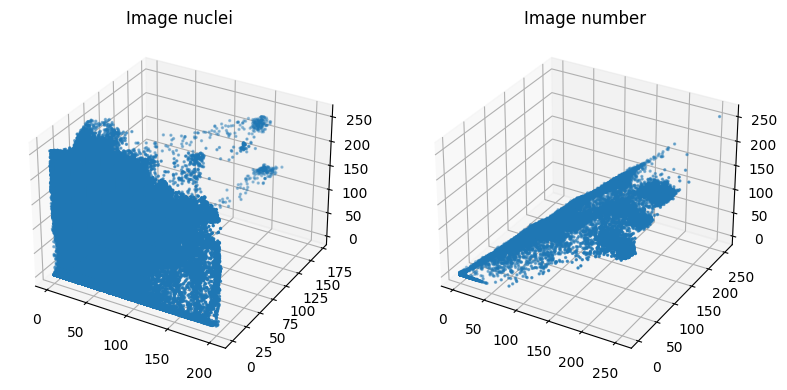

In [ ]:
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(121, projection='3d')
ax.set_title("Image nuclei")
ax.scatter(img_nuclei[:,:,0], img_nuclei[:,:,1], img_nuclei[:,:,2], s=2)

ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("Image number")
ax2.scatter(img_number[:,:,0], img_number[:,:,1], img_number[:,:,2], s=2)
plt.show()



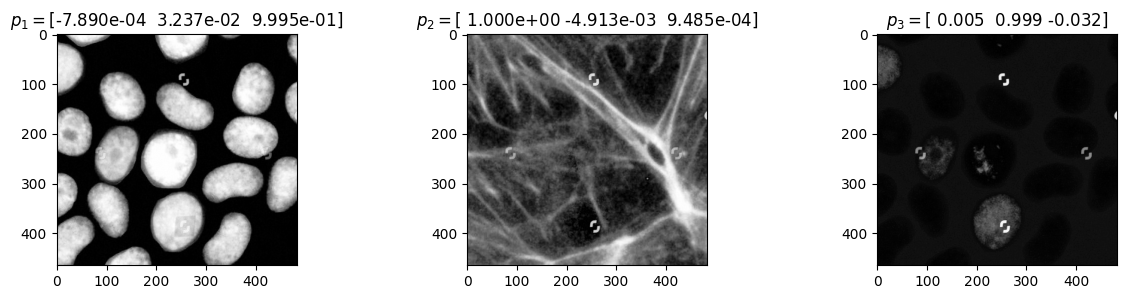

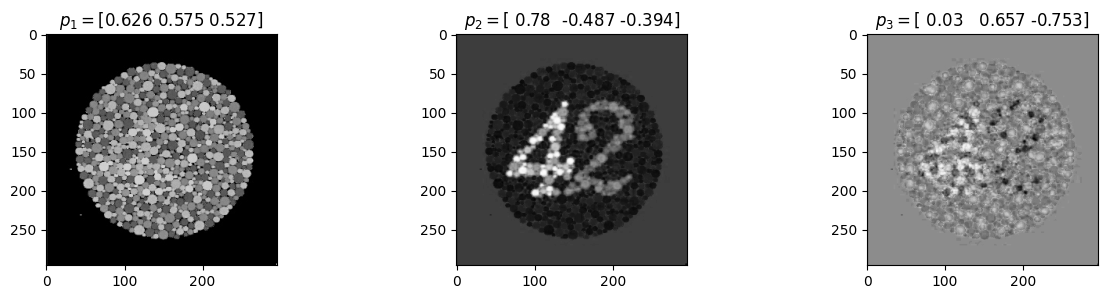

In [ ]:
def process_image(input_image):
    h, w, _ = input_image.shape
    M = input_image.reshape((h*w,3))
    pca = decomposition.PCA(n_components=3)
    M_transformed = pca.fit_transform(M)

    fig, axes = plt.subplots(1, 3, figsize=(15, 3))
    for i in range(3):
        axes[i].imshow(M_transformed[:,i].reshape((h, w)), cmap="Greys_r")
        axes[i].set_title(f"$p_{i+1} = ${np.array2string(pca.components_[i], precision=3)}")
    plt.show()

process_image(img_nuclei)
process_image(img_number)

# SVD:

In [ ]:
img_baboon = img_nuclei = imageio.v3.imread('https://raw.githubusercontent.com/lorek/datasets/master/baboon.bmp',pilmode='L')

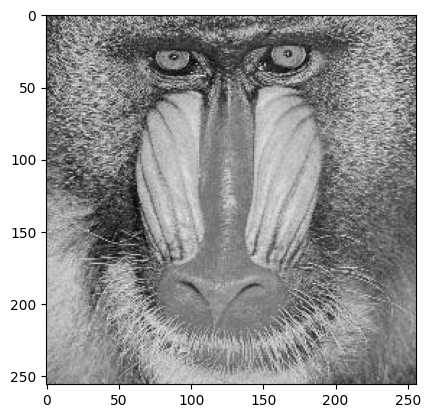

In [ ]:
plt.imshow(img_baboon,cmap='gray')
plt.show()

In [ ]:
U,eigenvals,VT=np.linalg.svd(img_baboon)

Lambda=np.diag(eigenvals)

In [ ]:
print("img_baboon.shape = ", img_baboon.shape)
print("U.shape = ", U.shape, " eigenvals.shape = ", eigenvals.shape, ", Lambda.shape = ", Lambda.shape, ", VT.shape = ", VT.shape)

img_baboon.shape =  (256, 256)
U.shape =  (256, 256)  eigenvals.shape =  (256,) , Lambda.shape =  (256, 256) , VT.shape =  (256, 256)
[[3.31443006e+04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.78419196e+03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.14166480e+03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.92415559e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.16936492e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.86303728e+00]]


In [ ]:
def reconstr_matrix(U,D,VT,k):
    rec_mat=np.dot(U[:,:k],np.dot(D[:k,:k],VT[:k,:]))
    return rec_mat

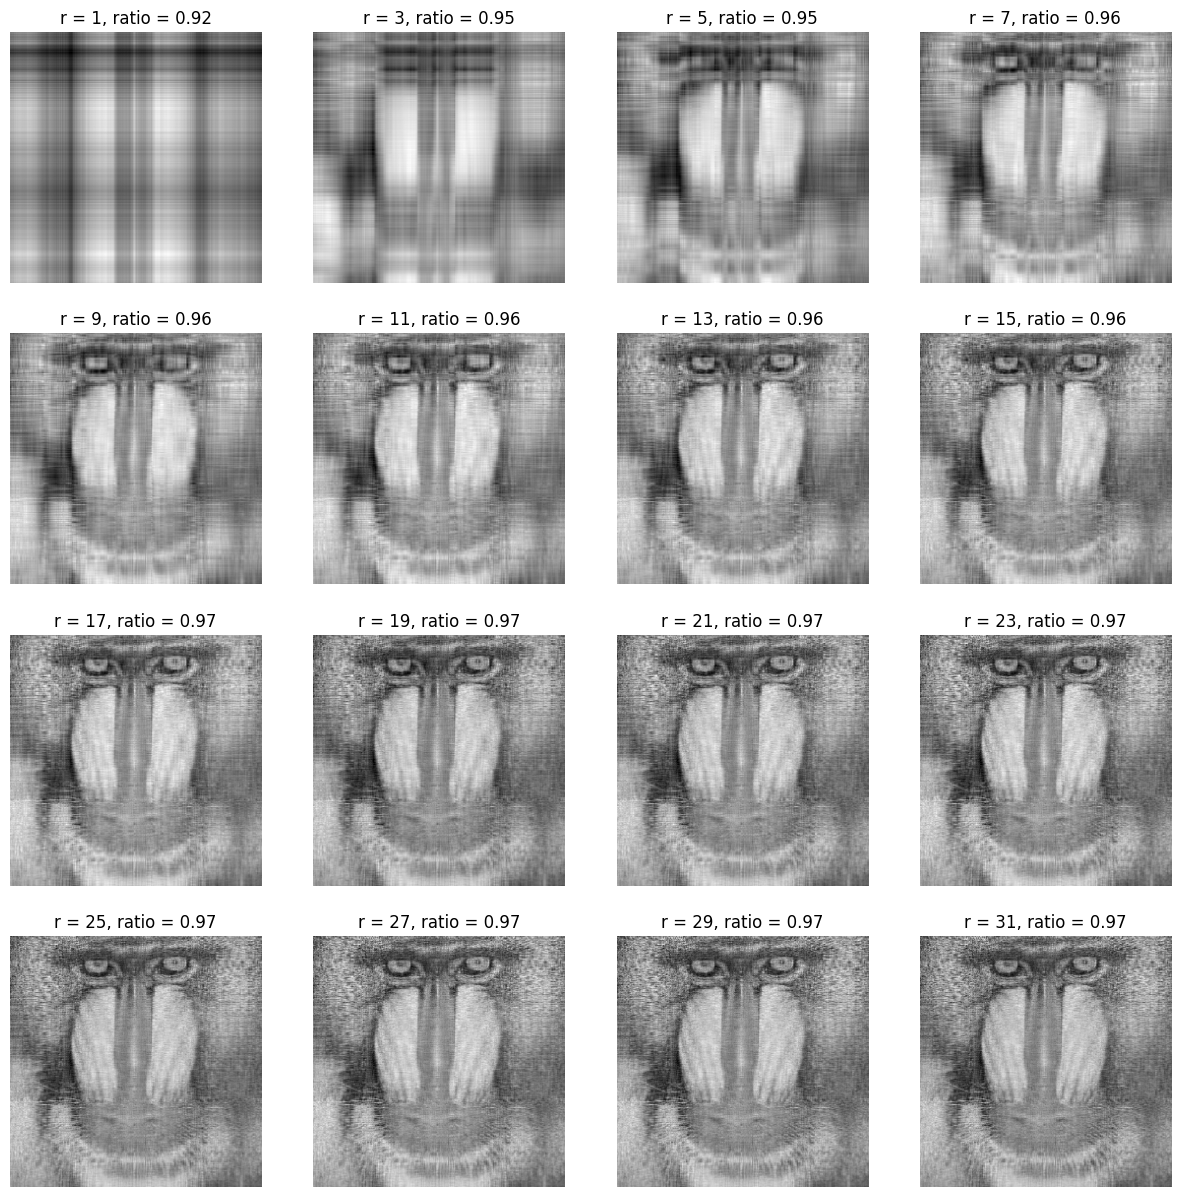

In [ ]:
rows=cols=4
how_much_rec=1
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

sum_of_all_lambdas = sum(eigenvals**2)

for ax in axes.flatten():
  rr=reconstr_matrix(U,Lambda,VT,how_much_rec)
  sum_of_lambdas = np.trace(Lambda[:how_much_rec, :how_much_rec]**2)
  ratio = sum_of_lambdas/sum_of_all_lambdas
  ax.imshow(rr, cmap=plt.get_cmap('gray'))
  ax.set_title("r = " + str(how_much_rec) + ", ratio = " + str(round(ratio,2)))
  ax.axis('off')
  how_much_rec+=2;

# Q3.3
* a) In the above plot with reconstructions add the ratio $(\lambda_1+\ldots+\lambda_r)/(\lambda_1+\ldots+\lambda_d)$ in the title of each image.
* b) make a separate 2d plot: on $x$-axis there should be $r$, on $y$-axis there should be $||\mathbf{Z}-\mathbf{Z}_r||^2$.
* c) for what $r$ do we have $(\lambda_1+\ldots+\lambda_r)/(\lambda_1+\ldots+\lambda_d)\geq 0.95$ ?

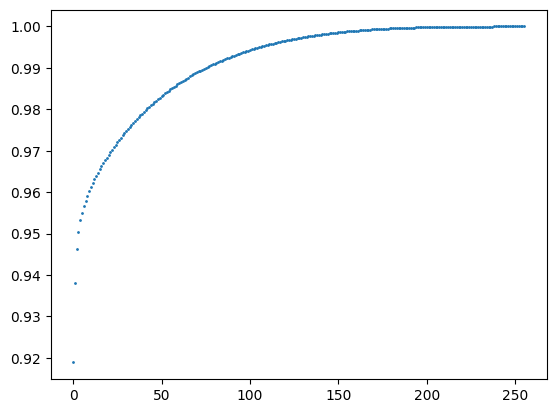

3


In [ ]:
# b)
eigensum = np.trace(Lambda**2)
eigensums = np.cumsum(eigenvals**2)/eigensum
plt.plot(eigensums, marker = "o", markersize=1, linestyle="None")
plt.show()

#c)
index = np.argmax(eigensums >=0.95)
print(index)

# lfw PEOPLE faces

In [ ]:
image_data = datasets.fetch_lfw_people()

In [ ]:
lfw_dataset = datasets.fetch_lfw_people()
# limit
max_n=1000
lfw_images =        lfw_dataset.images[:max_n]
lfw_data_classes =  lfw_dataset.target[:max_n]
lfw_classes_names  =     lfw_dataset.target_names

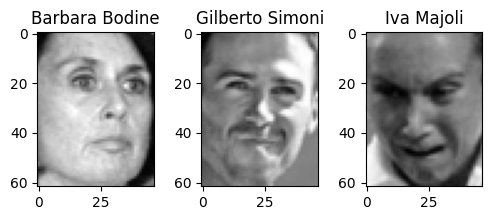

In [ ]:
plt.figure(figsize=(6,2))
plt.subplot(1,3,1);
plt.imshow(lfw_images[5], cmap='gray')
plt.title(lfw_classes_names[lfw_data_classes[5]])
plt.subplot(1,3,2);
plt.imshow(lfw_images[43], cmap='gray')
plt.title(lfw_classes_names[lfw_data_classes[43]])
plt.subplot(1,3,3);
plt.imshow(lfw_images[53], cmap='gray')
plt.title(lfw_classes_names[lfw_data_classes[53]])
plt.show()

In [ ]:
#nr of images = d
d=lfw_images.shape[0]

# "nr of points " = height * width
height = lfw_images.shape[1]
width =  lfw_images.shape[2]

n=height*width



In [ ]:
all_images_as_columns = np.zeros((n,d))

for nr in np.arange(d):
  image = lfw_images[nr].reshape(-1)
  all_images_as_columns[:,nr]=image


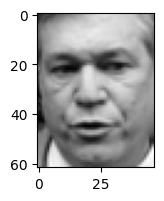

In [ ]:
# sanity check, column 33
plt.figure(figsize=(3,2))
image33=all_images_as_columns[:,33]
plt.imshow(image33.reshape(height,width),cmap='gray')

In [ ]:
U,eigenvals,VT=np.linalg.svd(all_images_as_columns,full_matrices=False)

Lambda = np.diag(eigenvals)
print("U.shape = ", U.shape, " eigenvals.shape = ", eigenvals.shape, ", Lambda.shape = ", Lambda.shape, ", VT.shape = ", VT.shape)

U.shape =  (2914, 1000)  eigenvals.shape =  (1000,) , Lambda.shape =  (1000, 1000) , VT.shape =  (1000, 1000)


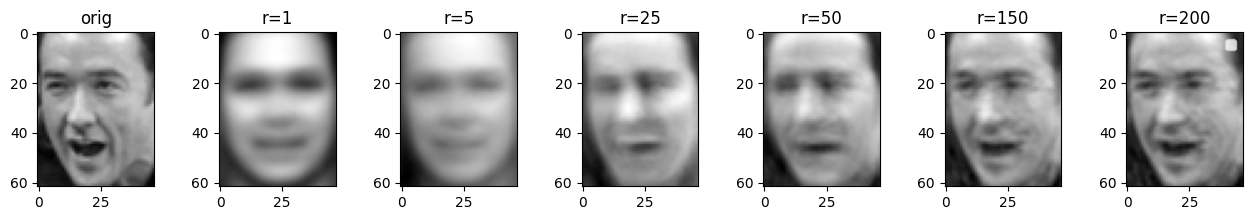

In [ ]:
plt.figure(figsize=(16,2))

# reconstruct for r = 1,2,5, 15, 25

r_list = [1,5,25, 50 ,150, 200]

plt.subplot(1,len(r_list)+1,1);
plt.imshow(lfw_images[12],cmap='gray')
plt.title("orig")
for nr,r in enumerate(r_list):
  faces_reconstructed=np.dot(U[:,:r],np.dot(Lambda[:r,:r],VT[:r,:]))
  plt.subplot(1,len(r_list)+1,nr+2);
  plt.imshow(faces_reconstructed[:,12].reshape(height,width),cmap='gray')
  plt.title("r="+str(r))

plt.legend()
plt.show()


# Q3.4

* Extend the above: sample randomly 6 images, show reconstruction of each one in a separate row
* In example presented above we showed: orig, r=1, r=5, r=25, r=50, r=150, r=200. Add one more colum: with  (smallest) $r$ that $(\lambda_1+\ldots+\lambda_r)/(\lambda_1+\ldots+\lambda_d)\geq0.9$ (for all faces)

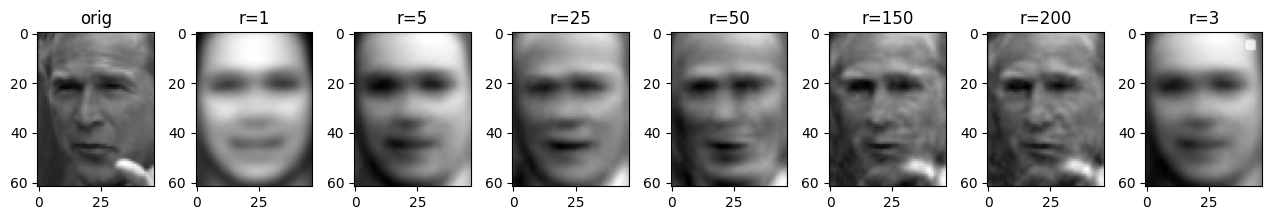

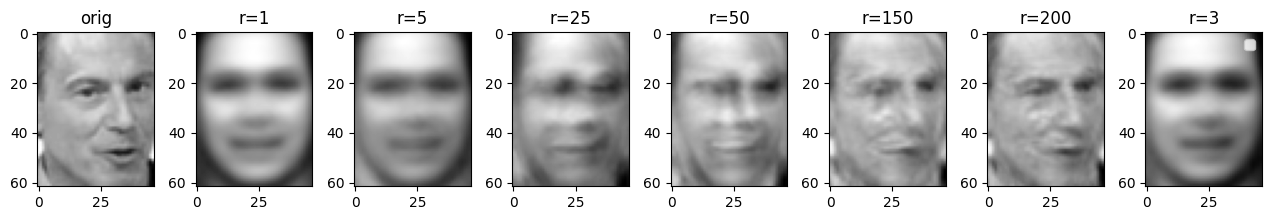

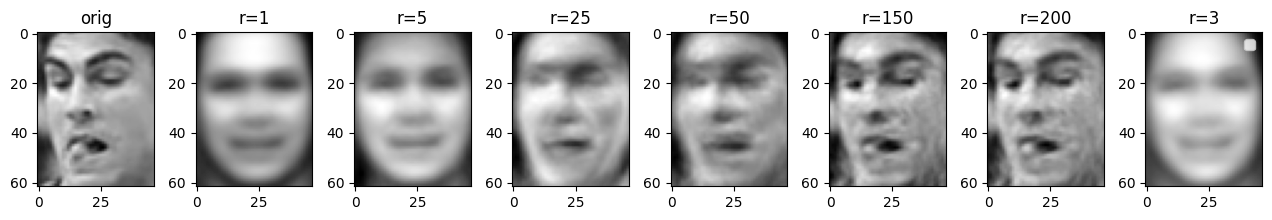

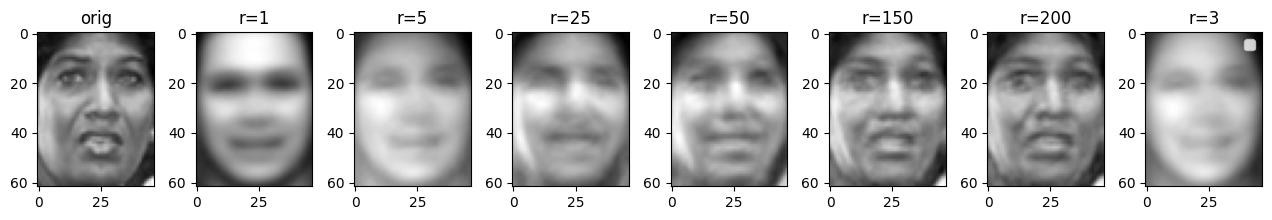

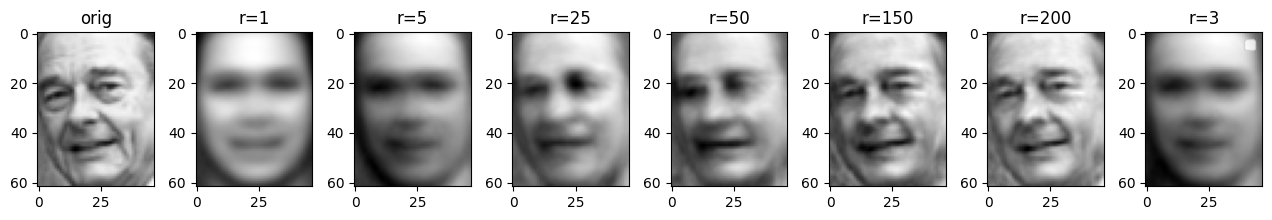

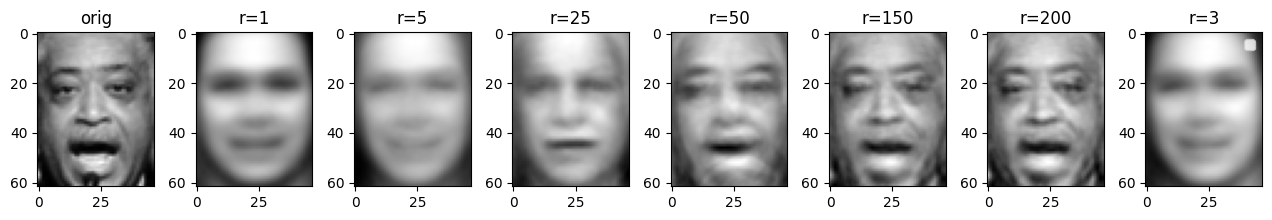

[None, None, None, None, None, None]

In [ ]:
import random
random.seed(121)

r_list = [1,5,25, 50 ,150, 200, 0]

def fun(index):
  plt.figure(figsize=(16,2))
  plt.subplot(1,len(r_list)+1,1);
  plt.imshow(lfw_images[index],cmap='gray')
  plt.title("orig")

  eigensums = np.cumsum(eigenvals**2)/np.trace(Lambda**2)
  r_list[6] = np.argmax(eigensums >=0.95)
  for nr,r in enumerate(r_list):
    faces_reconstructed=np.dot(U[:,:r],np.dot(Lambda[:r,:r],VT[:r,:]))
    plt.subplot(1,len(r_list)+1,2+nr);
    plt.imshow(faces_reconstructed[:,index].reshape(height,width),cmap='gray')
    plt.title("r="+str(r))

  plt.legend()
  plt.show()

indexes = random.sample(range(0,d), 6)
[fun(i) for i in indexes]


## kernel PCA

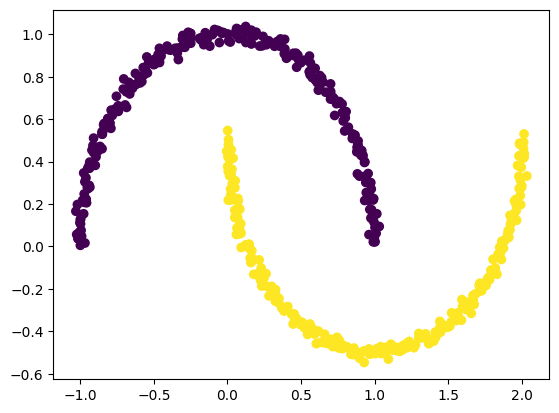

In [ ]:
# moons "dataset" (distribution):

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.02, random_state=417)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

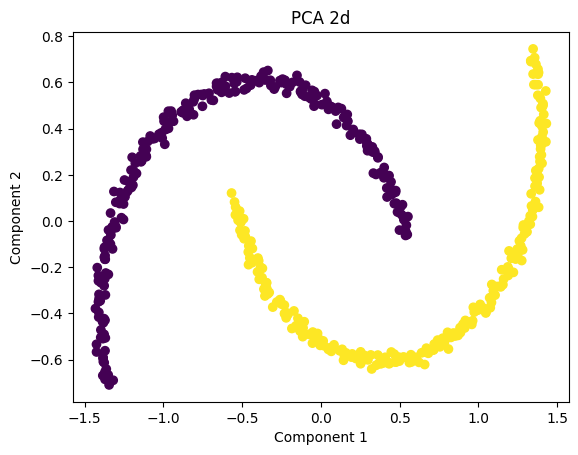

In [ ]:

pca2d = decomposition.PCA(n_components=2)
X_pca2d = pca2d.fit_transform(X)

plt.title("PCA 2d")
plt.scatter(X_pca2d[:, 0], X_pca2d[:, 1], c=y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

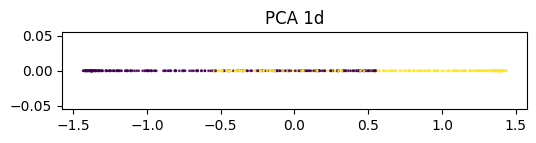

In [ ]:
pca1d = decomposition.PCA(n_components=1)
X_pca1d = pca1d.fit_transform(X)

plt.figure(figsize=(6,1))
plt.title("PCA 1d")
plt.scatter(X_pca1d , np.zeros(X_pca1d.shape[0]), c=y, s=1, alpha=0.8)
plt.show()

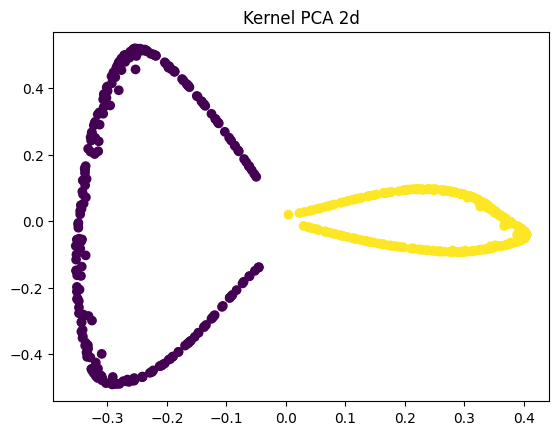

In [ ]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

plt.title("Kernel PCA 2d")
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.show()

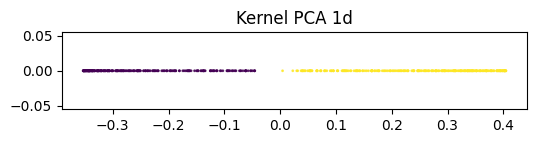

In [ ]:

plt.figure(figsize=(6,1))
plt.title("Kernel PCA 1d")
plt.scatter(X_kpca[:, 0],  np.zeros(len(X_kpca[:, 0])), c=y, s=1, alpha=0.8)
plt.show()

In [ ]:
# make circles
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=0)


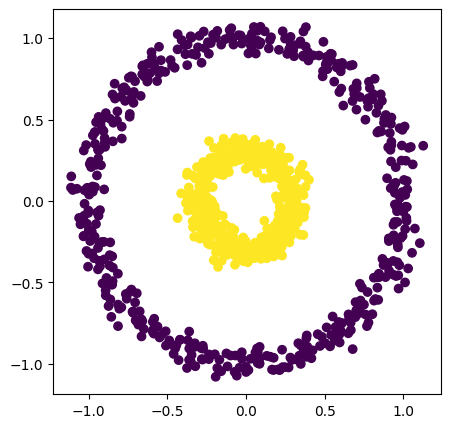

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Q3.5
* a) Perform PCA to 1d for "circles"
* b) From "circles" convert each point $\mathbf{x}=(x,y)$ to $\mathbf{x}'=\left(x,y, \exp\left({x^2+y^2\over 1.25}\right)\right)$ and draw them (keep the same colors). Plot them.
* c) Perform PCA to 1d for transformed $\mathbf{x}_1',\mathbf{x}_2',\ldots$
* d) Perform kernel PCA for "circles", try several different kernels with different parameters, try to find one such that points projected to 1d are separable
* e) Going back to moons: try different parameter `gamma`, try different kernels.


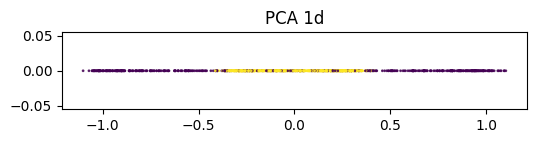

In [ ]:
# a)
pca1d = decomposition.PCA(n_components=1)
X_pca1d = pca1d.fit_transform(X)

plt.figure(figsize=(6,1))
plt.title("PCA 1d")
plt.scatter(X_pca1d , np.zeros(X_pca1d.shape[0]), c=y, s=1, alpha=0.8)
plt.show()

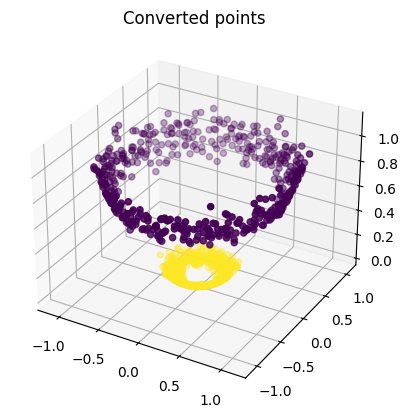

In [ ]:
# b)
def convert_points(x,y):
  return(x,y,(x**2+y**2)/1.25)

newX = [convert_points(X[i,0], X[i,1]) for i in range(0, len(X))]
newX = np.array(newX)

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Converted points")
ax.scatter(newX[:,0], newX[:,1], newX[:,2], c=y)

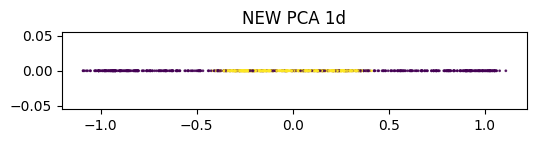

In [ ]:
# c)
pca1d = decomposition.PCA(n_components=1)
newX_pca1d = pca1d.fit_transform(newX)

plt.figure(figsize=(6,1))
plt.title("NEW PCA 1d")
plt.scatter(newX_pca1d , np.zeros(newX_pca1d.shape[0]), c=y, s=1, alpha=0.8)
plt.show()

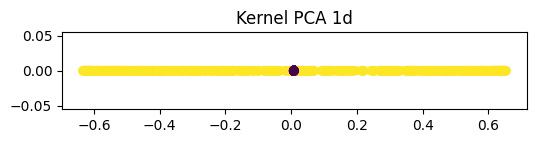

In [ ]:
# d)
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X)

plt.figure(figsize=(6,1))
plt.title("Kernel PCA 1d")
plt.scatter(X_kpca[:, 0],np.zeros(len(X_kpca[:, 0])), c=y)
plt.show()

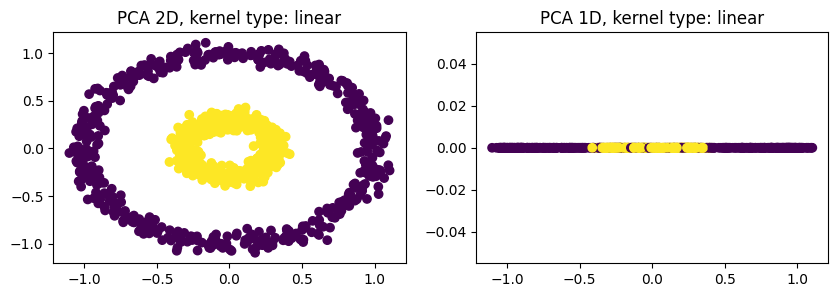

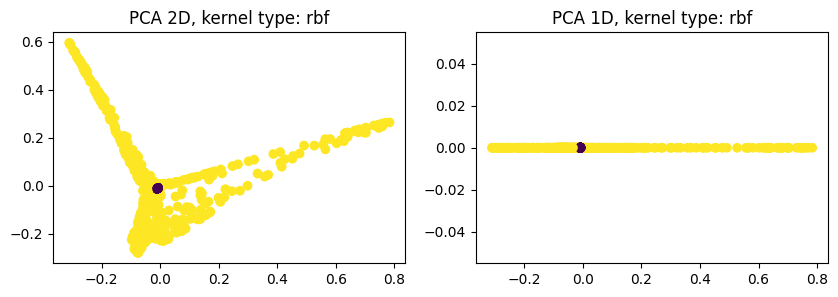

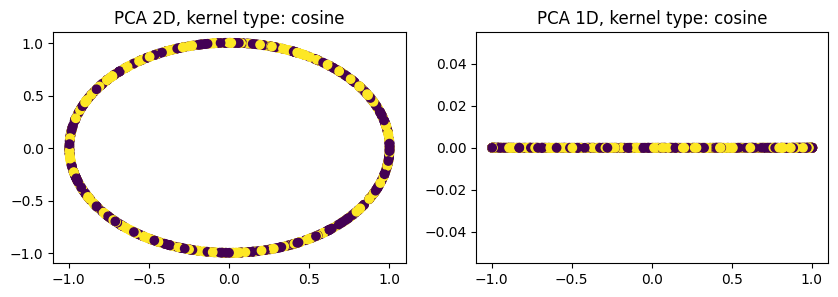

[None, None, None, None]

In [ ]:
def plot_kernel_pca(kernel_type):
  kpca = KernelPCA(kernel=kernel_type, gamma=200)
  X_kpca = kpca.fit_transform(X)

  fig, axes = plt.subplots(1, 2, figsize=(10, 3))
  axes[0].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
  axes[0].set_title("PCA 2D, kernel type: " + kernel_type)
  axes[1].scatter(X_kpca[:, 0],np.zeros(len(X_kpca[:, 0])), c=y)
  axes[1].set_title("PCA 1D, kernel type: " + kernel_type)
  plt.show()

types = ['linear', 'poly', 'rbf',  'cosine']
[plot_kernel_pca(i) for i in types]